In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns
import pickle
import warnings
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
df.shape

(31647, 18)

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
data.shape

(13564, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [8]:
print(df['job'].value_counts().sort_values())
print(df['marital'].value_counts().sort_values())
print(df['education'].value_counts().sort_values())
print(df['default'].value_counts().sort_values())
print(df['housing'].value_counts().sort_values())
print(df['loan'].value_counts().sort_values())
print(df['contact'].value_counts().sort_values())
print(df['month'].value_counts().sort_values())
print(df['poutcome'].value_counts().sort_values())
print(df['subscribed'].value_counts().sort_values())

unknown           206
student           635
housemaid         874
unemployed        905
entrepreneur     1008
self-employed    1123
retired          1574
services         2903
admin.           3631
technician       5307
management       6639
blue-collar      6842
Name: job, dtype: int64
divorced     3630
single       8922
married     19095
Name: marital, dtype: int64
unknown       1314
primary       4808
tertiary      9301
secondary    16224
Name: education, dtype: int64
yes      585
no     31062
Name: default, dtype: int64
no     14063
yes    17584
Name: housing, dtype: int64
yes     5131
no     26516
Name: loan, dtype: int64
telephone     2047
unknown       9177
cellular     20423
Name: contact, dtype: int64
dec     157
mar     342
sep     410
oct     512
jan     977
feb    1827
apr    2055
nov    2783
jun    3738
aug    4333
jul    4844
may    9669
Name: month, dtype: int64
success     1068
other       1288
failure     3362
unknown    25929
Name: poutcome, dtype: int64
yes     3715


In [9]:
df['job']=df['job'].replace({'unknown':0,'student':1,'housemaid':2,'unemployed':3,'entrepreneur':4,'self-employed':5,'retired':6,'services':7,'admin.':8,'technician':9,'management':10,'blue-collar':11})
df['marital']=df['marital'].replace({'divorced':0,'single':1,'married':2})
df['education']=df['education'].replace({'unknown':0,'primary':1,'secondary':2,'tertiary':3})
df['default']=df['default'].replace({'yes':0,'no':1})
df['housing']=df['housing'].replace({'yes':0,'no':1})
df['loan']=df['loan'].replace({'yes':0,'no':1})
df['contact']=df['contact'].replace({'telephone':0,'unknown':1,'cellular':2})
df['month']=df['month'].replace({'dec':0,'mar':1,'sep':2,'oct':3,'jan':4,'feb':5,'apr':6,'nov':7,'jun':8,'aug':9,'jul':10,'may':11})
df['poutcome']=df['poutcome'].replace({'success':0,'failure':1,'other':2,'unknown':3})
df['subscribed']=df['subscribed'].replace({'yes':0,'no':1})

In [10]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,8,2,0,1,1933,1,1,0,19,7,44,2,-1,0,3,1
1,40576,31,0,2,2,1,3,1,1,2,20,10,91,2,-1,0,3,1
2,15320,27,7,2,2,1,891,0,1,2,18,10,240,1,-1,0,3,1
3,43962,57,10,0,3,1,3287,1,1,2,22,8,867,1,84,3,0,0
4,29842,31,9,2,2,1,119,0,1,2,4,5,380,1,-1,0,3,1


In [12]:
df=df.drop('ID',axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

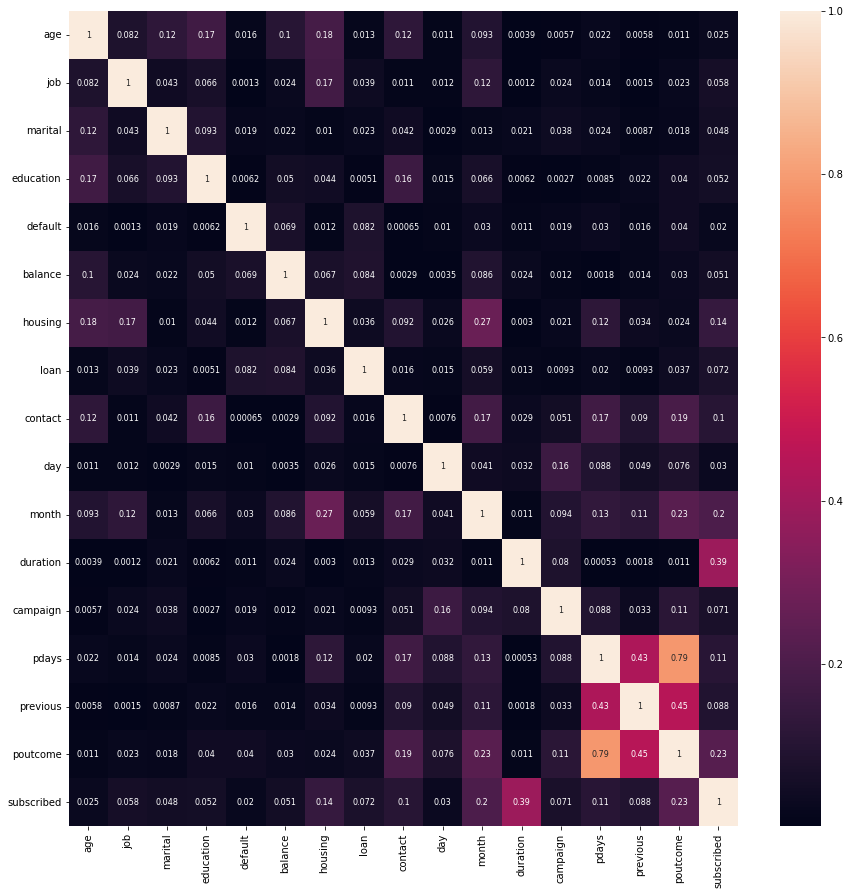

In [13]:
df_corr=df.corr().abs()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True,annot_kws={'size':8})
plt.show

In [14]:
data=data.drop('ID',axis=1)

In [17]:
x=df.drop('subscribed',axis=1)
y=df['subscribed']

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
bestf=SelectKBest(score_func=f_classif,k=16)
fit=bestf.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [21]:
feat_score=pd.concat([df_columns,df_scores],axis=1)
feat_score.columns=['Feature_Name','score']
print(feat_score.nlargest(12,'score'))

   Feature_Name        score
11     duration  5671.062516
15     poutcome  1697.918761
10        month  1364.763463
6       housing   642.748084
13        pdays   375.492162
8       contact   344.898297
14     previous   247.430356
7          loan   166.127429
12     campaign   158.549603
1           job   108.095613
3     education    87.427377
5       balance    81.897908


In [26]:
ndf=df[['duration','poutcome','month','housing','pdays','contact','previous','loan','campaign','job','education','balance']]
ndf.head()

,duration,poutcome,month,housing,pdays,contact,previous,loan,campaign,job,education,balance
0,44,3,7,1,-1,0,0,1,2,8,0,1933
1,91,3,10,1,-1,2,0,1,2,0,2,3
2,240,3,10,0,-1,2,0,1,1,7,2,891
3,867,0,8,1,84,2,3,1,1,10,3,3287
4,380,3,5,0,-1,2,0,1,1,9,2,119


In [27]:
x=df.drop('subscribed',axis=1)
y=df['subscribed']

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xsc = sc.fit_transform(x)

In [34]:
x_train=xsc
y_train=y

In [42]:
y_pred=clf.predict(x_train)
print("\n ---- Train result ----")
print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")


 ---- Train result ----
Accuracy Score : 100.00%


In [36]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
data['job']=data['job'].replace({'unknown':0,'student':1,'housemaid':2,'unemployed':3,'entrepreneur':4,'self-employed':5,'retired':6,'services':7,'admin.':8,'technician':9,'management':10,'blue-collar':11})
data['marital']=data['marital'].replace({'divorced':0,'single':1,'married':2})
data['education']=data['education'].replace({'unknown':0,'primary':1,'secondary':2,'tertiary':3})
data['default']=data['default'].replace({'yes':0,'no':1})
data['housing']=data['housing'].replace({'yes':0,'no':1})
data['loan']=data['loan'].replace({'yes':0,'no':1})
data['contact']=data['contact'].replace({'telephone':0,'unknown':1,'cellular':2})
data['month']=data['month'].replace({'dec':0,'mar':1,'sep':2,'oct':3,'jan':4,'feb':5,'apr':6,'nov':7,'jun':8,'aug':9,'jul':10,'may':11})
data['poutcome']=data['poutcome'].replace({'success':0,'failure':1,'other':2,'unknown':3})

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xsc = sc.fit_transform(x)

In [ ]:
x_test=xsc
y_test=y